# U.S. Medical Insurance Costs

## Defining project objectives (selection of analysis targets):

1.) Average age of patients

2.) Regional distribution of patients

3.) Gender distribution

4.) Differences in BMI between smokers and non-smokers

5.) Differences in insurance costs between smokers and non-smokers

6.) Differences in average age between individuals with children and those without children

7.) Observations of the common characteristics of persons with the top 100 highest and lowest insurance costs.

### Import dataset

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define function for importing csv dataset and converting it to Pamdas Dataframe

def read_csv_to_df(csv_file):
    df = pd.read_csv(csv_file)
    return df
    

In [2]:
# Run the conversion function and test the functionality

if __name__ == "__main__":
    csv_file = "./insurance.csv"
    insurance_df = read_csv_to_df(csv_file)
    print(insurance_df.head(10))
    print()
    print(f"Dataset size: {len(insurance_df)} rows.")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

Dataset size: 1338 rows.


## Build out analysis functions and execute analysis

### 1.) Average age of patients

In [3]:
# Define function for calculating average age of patients

def calculate_average_age(df):
    avg_age = df['age'].mean()
    return avg_age

In [4]:
# Run the average age function and print results

if __name__ == "__main__":
    avg_age = calculate_average_age(insurance_df)
    print(f"The average age of patients is {round(avg_age)} years.")

The average age of patients is 39 years.


### 2.) Regional distribution of patients

In [5]:
# Define function for calculating regional distribution of patients

def calculate_reg_distribution(df):
    reg_dist = df['region'].value_counts()
    return reg_dist

# Define function for visualizing regional distribution of patients

def visualize_reg_distribution(reg_dist):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Regional Distribution')
    labels = reg_dist.index
    sizes = reg_dist.values
    autopct_fmt = lambda pct: f"{sizes[int(pct/100.*len(sizes))]:d} ({pct:.0f}%)"
    ax.pie(sizes, labels=labels, autopct=autopct_fmt)
    plt.show()
    

The regional distribution of patients: 


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

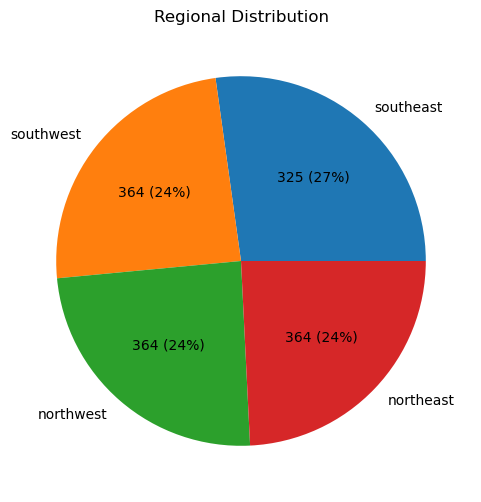

In [6]:
# Run the regional distribution function and print results

if __name__ == "__main__":
    reg_dist = calculate_reg_distribution(insurance_df)
    print(f"The regional distribution of patients: ")
    display(reg_dist)
    print()
    visualize_reg_distribution(reg_dist)

### 3.) Gender distribution

In [7]:
# Define function for calculating gender distribution of patients

def calculate_gen_distribution(df):
    gen_dist = df['sex'].value_counts()
    return gen_dist

# Define function for visualizing regional distribution of patients

def visualize_gen_distribution(gen_dist):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Gender Distribution')

    gen_labels = gen_dist.index
    gen_values = gen_dist.values

    gen_labels = np.flip(gen_labels)
    gen_values = np.flip(gen_values)
    colors = ['red', 'blue']

    bars = ax.bar(gen_labels, gen_values, color=colors)
    ax.set_ylabel('Count')

    total = gen_dist.sum()
    for i, v in enumerate(gen_values):
        percentage = v / total * 100
        ax.text(i, v, f'{v} ({percentage:.1f}%)', ha='center', va='bottom')

    plt.show()

The gender distribution of patients: 


male      676
female    662
Name: sex, dtype: int64

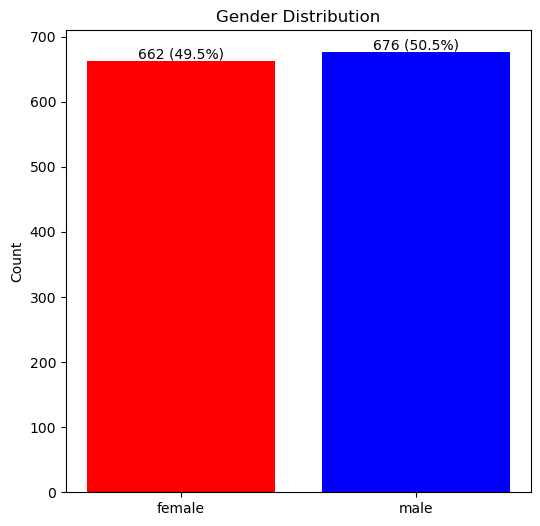

In [8]:
# Run the gender distribution function and print results

if __name__ == "__main__":
    gen_dist = calculate_gen_distribution(insurance_df)
    print(f"The gender distribution of patients: ")
    display(gen_dist)
    print()
    visualize_gen_distribution(gen_dist)

### 4.) Differences in BMI between smokers and non-smokers

In [9]:
# Define function for analyzing differences in BMIs between smokers and no-smokers

def analyse_smoking_and_bmi(df):
    smoker_df = df[df['smoker'] == "yes"].reset_index(drop=True)
    smoker_bmi = smoker_df['bmi']
    
    no_smoker_df = df[df['smoker'] == "no"].reset_index(drop=True)
    no_smoker_bmi = no_smoker_df['bmi']    
    
    smoking_bmi_analysis = pd.DataFrame({'no_smoker_bmi': no_smoker_bmi.describe().round(2),
                                         'smoker_bmi': smoker_bmi.describe().round(2)})
    
    return smoking_bmi_analysis


# Define function for visualizing differences in BMIs between smokers and non smokers

def visualize_smoking_and_bmi_analysis(smoking_bmi_analysis):
    labels = smoking_bmi_analysis.index.tolist()
    no_smoker_bmi_values = smoking_bmi_analysis['no_smoker_bmi'].tolist()
    smoker_bmi_values = smoking_bmi_analysis['smoker_bmi'].tolist()

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, no_smoker_bmi_values, width, label='No Smokers')
    rects2 = ax.bar([i + width for i in x], smoker_bmi_values, width, label='Smokers')

    ax.set_ylabel('BMI')
    ax.set_title('BMI Comparison: Smokers vs. No Smokers')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')  
    ax.legend()

    
    for rect, height in zip(rects1, no_smoker_bmi_values):
        if height > ax.get_ylim()[1]:  
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, ax.get_ylim()[1]),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', rotation=45)  
        else:
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', rotation=45) 
    for rect, height in zip(rects2, smoker_bmi_values):
        if height > ax.get_ylim()[1]: 
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, ax.get_ylim()[1]),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', rotation=45) 
        else:
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', rotation=45) 

    ax.set_ylim(0, 1300)
    ax.yaxis.set_ticks(np.arange(0, 1300, 200))

    fig.tight_layout()
    plt.show()

       no_smoker_bmi  smoker_bmi
count        1064.00      274.00
mean           30.65       30.71
std             6.04        6.32
min            15.96       17.20
25%            26.32       26.08
50%            30.35       30.45
75%            34.43       35.20
max            53.13       52.58



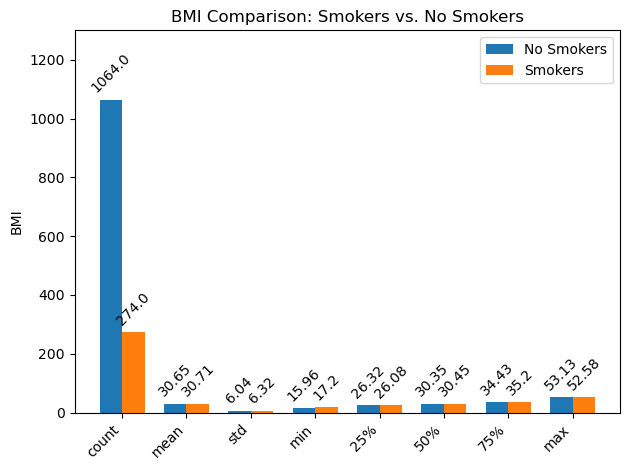

In [10]:
# Run the smoking and bmi analysis function and print results

if __name__ == "__main__":
    smoking_bmi_analysis = analyse_smoking_and_bmi(insurance_df)
    print(smoking_bmi_analysis)
    print()
    
    visualize_smoking_and_bmi_analysis(smoking_bmi_analysis)

### 5.) Differences in insurance costs between smokers and non-smokers

In [11]:
# Define function for analyzing differences in insurance costs between smokers and no-smokers

def analyse_smoking_and_costs(df):
    smoker_df = df[df['smoker'] == "yes"].reset_index(drop=True)
    smoker_costs = smoker_df['charges']
    
    no_smoker_df = df[df['smoker'] == "no"].reset_index(drop=True)
    no_smoker_costs = no_smoker_df['charges']    
    
    smoking_costs_analysis = pd.DataFrame({'no_smoker_insurance_costs': no_smoker_costs.describe().round(2).astype(int),
                                         'smoker_insurance_costs': smoker_costs.describe().round(2).astype(int)})
    
    return smoking_costs_analysis


# Define function for visualizing differences in insurance costs between smokers and non smokers

def visualize_smoking_and_costs_analysis(df):

    smoker_costs = df[df['smoker'] == "yes"]['charges']
    no_smoker_costs = df[df['smoker'] == "no"]['charges']

    data = [smoker_costs, no_smoker_costs]
    labels = ['Smokers', 'No Smokers']

    fig, ax = plt.subplots()
    box = ax.boxplot(data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

    # Lisätään minimi- ja maksimiarvot sekä keskiarvot
    for i, d in enumerate(data):
        ax.text(i + 1.1, max(d), f"Max: {int(max(d))}", ha='left', va='center', fontsize=10)
        ax.text(i + 1.1, min(d), f"Min: {int(min(d))}", ha='left', va='center', fontsize=10)
        ax.text(i + 1.1, np.mean(d), f"Mean: {int(np.mean(d))}", ha='left', va='center', fontsize=10)

        quartiles = np.percentile(d, [25, 50, 75])  # Lasketaan kvartiilien arvot
        ax.text(i + 0.9, quartiles[2], f"75%: {int(quartiles[2])}", ha='right', va='center', fontsize=10)
        ax.text(i + 0.9, quartiles[0], f"25%: {int(quartiles[0])}", ha='right', va='center', fontsize=10)
        ax.text(i + 0.9, quartiles[1], f"50%: {int(quartiles[1])}", ha='right', va='center', fontsize=10)

    ax.set_ylabel('Insurance Costs')
    ax.set_title('Insurance Costs Distribution: Smokers vs. No Smokers')

    plt.show()

       no_smoker_insurance_costs  smoker_insurance_costs
count                       1064                     274
mean                        8434                   32050
std                         5993                   11541
min                         1121                   12829
25%                         3986                   20826
50%                         7345                   34456
75%                        11362                   41019
max                        36910                   63770



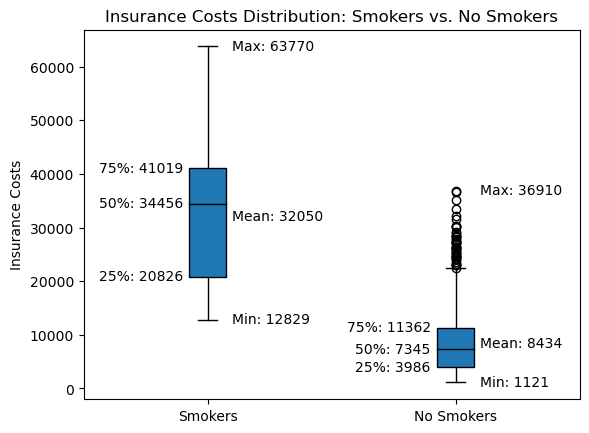

In [12]:
# Run the smoking and insurance costs analysis function and print results

if __name__ == "__main__":
    smoking_costs_analysis = analyse_smoking_and_costs(insurance_df)
    print(smoking_costs_analysis)
    print()
    visualize_smoking_and_costs_analysis(insurance_df)


### 6.) Differences in average age between individuals with children and those without children

In [13]:
# Define function for analyzing differences between average ages and different numbers of children

def analyse_avg_age_and_children(df):
    children_nums = df['children'].unique().tolist()
    children_nums.sort()

    avg_ages_female = []
    avg_ages_male = []
    
    for num in children_nums:
        df_reset = df[df['children'] == num].reset_index()
        
        avg_age_female = round(df_reset[df_reset['sex'] == 'female']['age'].mean(), 1)
        avg_age_male = round(df_reset[df_reset['sex'] == 'male']['age'].mean(), 1)
        
        avg_ages_female.append(avg_age_female)
        avg_ages_male.append(avg_age_male)
    
    avg_age_childen_analysis = pd.DataFrame(list(zip(children_nums, avg_ages_female, avg_ages_male)),
               columns =['children', 'avg_age_female', 'avg_age_male'])
    
    return avg_age_childen_analysis


# Define function for visualizing differences between average ages and different numbers of children

def visualize_avg_age_childen_analysis(avg_age_childen_analysis):
    children_nums = avg_age_childen_analysis['children']
    avg_age_female = avg_age_childen_analysis['avg_age_female']
    avg_age_male = avg_age_childen_analysis['avg_age_male']
    
    plt.plot(children_nums, avg_age_female, color='red', label='Average Age (Female)')
    plt.plot(children_nums, avg_age_male, color='blue', label='Average Age (Male)')
    
    plt.xlabel('Number of Children')
    plt.ylabel('Average Age')
    plt.title('Average Age vs. Number of Children')
    plt.legend()
    plt.show()

   children  avg_age_female  avg_age_male
0         0            38.3          38.5
1         1            39.5          39.4
2         2            40.5          38.4
3         3            42.2          41.0
4         4            42.0          36.6
5         5            37.0          34.5



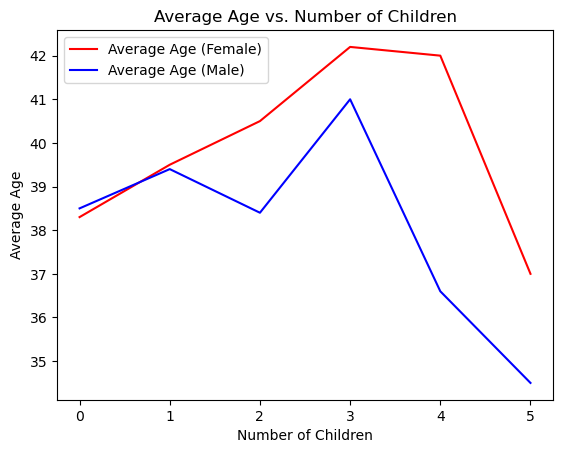

In [14]:
# Run the average age and number of children analysis function and print results

if __name__ == "__main__":
    avg_age_childen_analysis = analyse_avg_age_and_children(insurance_df)
    print(avg_age_childen_analysis)
    print()
    visualize_avg_age_childen_analysis(avg_age_childen_analysis)

### 7.) Observations of the common characteristics of persons with the top 100 highest and lowest insurance costs.

In [27]:
def analyse_top_and_bottom_100_costs(df):
    # Sort the dataframe based on the 'charges' column in ascending order
    sorted_df = df.sort_values('charges')
    
    # Get the top 100 highest and lowest insurance costs
    top_100_highest_costs = sorted_df.tail(100)
    top_100_lowest_costs = sorted_df.head(100)
    
    # Calculate the desired statistics for each group
    top_100_highest_stats = {
        'Age Range': f"{top_100_highest_costs['age'].min()} - {top_100_highest_costs['age'].max()}",
        'Average Age': round(top_100_highest_costs['age'].mean(), 1),
        'Male Percentage': round((top_100_highest_costs['sex'] == 'male').mean() * 100, 1),
        'Female Percentage': round((top_100_highest_costs['sex'] == 'female').mean() * 100, 1),
        'BMI Range': f"{top_100_highest_costs['bmi'].min()} - {top_100_highest_costs['bmi'].max()}",
        'Average BMI': round(top_100_highest_costs['bmi'].mean(), 1),
        'Average Children': round(top_100_highest_costs['children'].mean(), 1),
        'Non-Smokers Percentage': round((top_100_highest_costs['smoker'] == 'no').mean() * 100, 1),
        'Smokers Percentage': round((top_100_highest_costs['smoker'] == 'yes').mean() * 100, 1),
        'Most Popular Distribution': top_100_highest_costs['region'].value_counts().idxmax(),
        'Charges Range': f"{round(top_100_highest_costs['charges'].min())} - {round(top_100_highest_costs['charges'].max())}",
        'Average Charges': round(top_100_highest_costs['charges'].mean())
    }
    
    top_100_lowest_stats = {
        'Age Range': f"{top_100_lowest_costs['age'].min()} - {top_100_lowest_costs['age'].max()}",
        'Average Age': round(top_100_lowest_costs['age'].mean(), 1),
        'Male Percentage': round((top_100_lowest_costs['sex'] == 'male').mean() * 100, 1),
        'Female Percentage': round((top_100_lowest_costs['sex'] == 'female').mean() * 100, 1),
        'BMI Range': f"{top_100_lowest_costs['bmi'].min()} - {top_100_lowest_costs['bmi'].max()}",
        'Average BMI': round(top_100_lowest_costs['bmi'].mean(), 1),
        'Average Children': round(top_100_lowest_costs['children'].mean(), 1),
        'Non-Smokers Percentage': round((top_100_lowest_costs['smoker'] == 'no').mean() * 100, 1),
        'Smokers Percentage': round((top_100_lowest_costs['smoker'] == 'yes').mean() * 100, 1),
        'Most Popular Distribution': top_100_lowest_costs['region'].value_counts().idxmax(),
        'Charges Range': f"{round(top_100_lowest_costs['charges'].min())} - {round(top_100_lowest_costs['charges'].max())}",
        'Average Charges': round(top_100_lowest_costs['charges'].mean())
    }
    
    # Create a new DataFrame with the calculated statistics
    top_100_costs_stats = pd.DataFrame({'Top 100 Lowest Costs': top_100_lowest_stats, 'Top 100 Highest Costs': top_100_highest_stats})
    
    display(top_100_costs_stats)
    
    return top_100_costs_stats


# Define function for visualizing common characteristics of persons with the top 100 highest and lowest insurance costs
def visualize_top_and_bottom_100_costs(top_100_costs_stats):
    # Extract the required data from the DataFrame
    data = top_100_costs_stats.drop(['Age Range', 'BMI Range', 'Charges Range', 'Most Popular Distribution']).T

    # Remove unnecessary columns, keeping only the desired variables in the specified order
    data = data.loc[:, ['Average Charges', 'Average Age', 'Average BMI', 'Average Children', 'Male Percentage', 'Female Percentage', 'Non-Smokers Percentage', 'Smokers Percentage']]

    # Define the variables and their order
    variables = ['Average Charges', 'Average Age', 'Average BMI', 'Average Children', 'Male Percentage', 'Female Percentage', 'Non-Smokers Percentage', 'Smokers Percentage']

    # Create the bar chart with subplots
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))

    # Plot each subchart
    for i, variable in enumerate(variables):
        row = i // 2
        col = i % 2

        lowest_value = data.iloc[0][variable]
        highest_value = data.iloc[1][variable]

        axes[row, col].bar(['Top 100 Lowest Costs'], [lowest_value], color='lightblue')
        axes[row, col].bar(['Top 100 Highest Costs'], [highest_value], color='lightgreen')
        axes[row, col].set_ylabel('Value')
        axes[row, col].set_title(variable)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

,Top 100 Lowest Costs,Top 100 Highest Costs
Age Range,18 - 24,18 - 64
Average Age,19.6,45.7
Male Percentage,74.0,63.0
Female Percentage,26.0,37.0
BMI Range,15.96 - 53.13,30.2 - 52.58
Average BMI,30.0,36.5
Average Children,0.1,1.3
Non-Smokers Percentage,100.0,0.0
Smokers Percentage,0.0,100.0
Most Popular Distribution,southeast,southeast


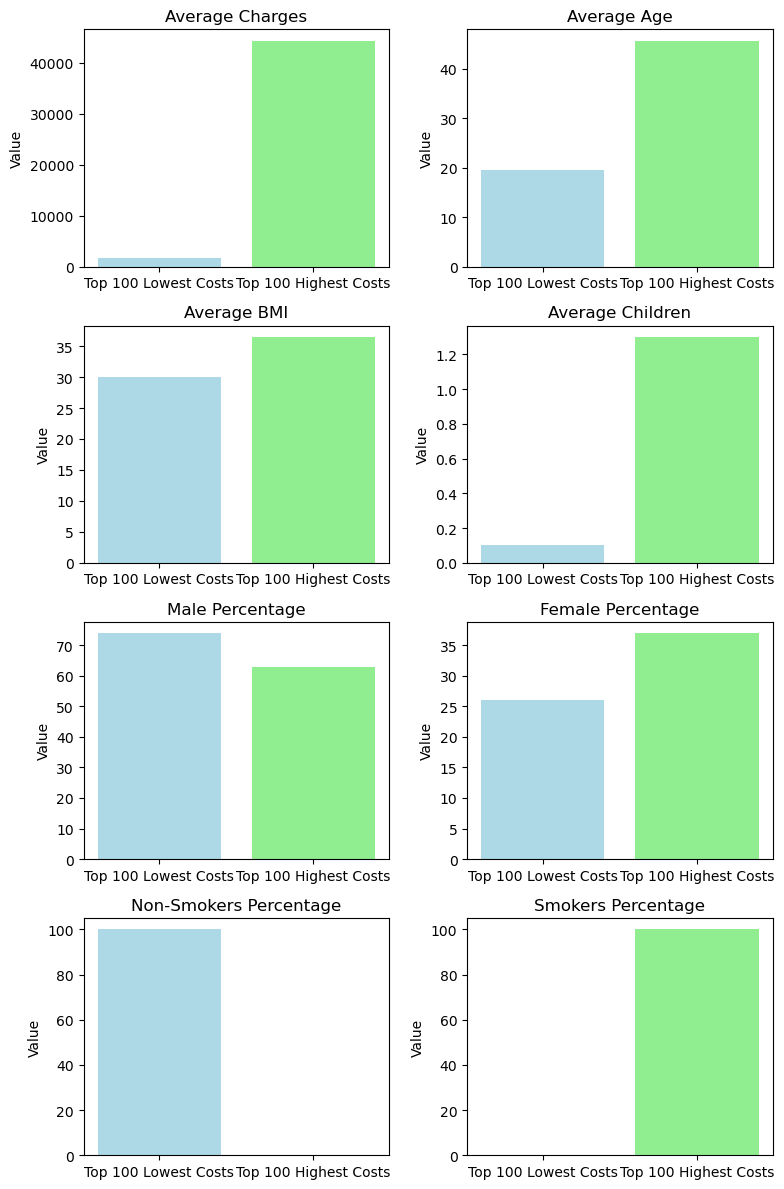

In [28]:
# Run the top 100 highest and lowest insurance costs analysis function and print results

if __name__ == "__main__":
    top_100_costs_stats = analyse_top_and_bottom_100_costs(insurance_df)
    
    visualize_top_and_bottom_100_costs(top_100_costs_stats)